## Transfer Learning ResNet50 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [60]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [61]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [62]:

# view the structure of the model
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [63]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [64]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [65]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 150 images belonging to 3 classes.


In [66]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 89 images belonging to 3 classes.


In [67]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
5/5 [==============================] - 89s 18s/step - loss: 7.7773 - accuracy: 0.3400 - val_loss: 5.0949 - val_accuracy: 0.2135
Epoch 2/50
5/5 [==============================] - 98s 21s/step - loss: 7.9580 - accuracy: 0.3133 - val_loss: 9.6021 - val_accuracy: 0.2135
Epoch 3/50
5/5 [==============================] - 84s 18s/step - loss: 5.9881 - accuracy: 0.3800 - val_loss: 5.2017 - val_accuracy: 0.4607
Epoch 4/50
5/5 [==============================] - 84s 18s/step - loss: 3.5473 - accuracy: 0.3667 - val_loss: 4.8759 - val_accuracy: 0.2247
Epoch 5/50
5/5 [==============================] - 89s 19s/step - loss: 2.5304 - accuracy: 0.4333 - val_loss: 2.4522 - val_accuracy: 0.5056
Epoch 6/50
5/5 [==============================] - 90s 19s/step - loss: 1.9119 - accuracy: 0.4600 - val_loss: 3.4612 - val_accuracy: 0.2809
Epoch 7/50
5/5 [==============================] - 88s 19s/step - loss: 2.0693 - accuracy: 0.4400 - val_loss: 1.7730 - val_accuracy: 0.5169
Epoch 8/50
5/5 [===========

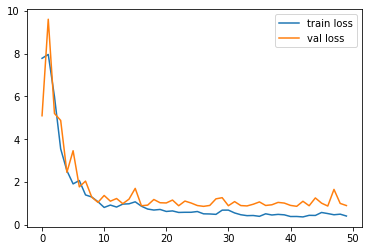

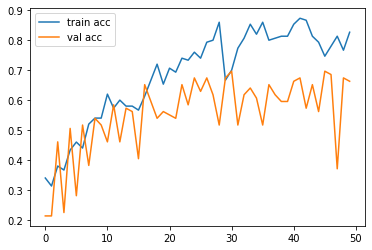

<Figure size 432x288 with 0 Axes>

In [68]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [69]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [70]:

y_pred = model.predict(test_set)


In [71]:
y_pred

array([[4.18847740e-01, 5.46886146e-01, 3.42660397e-02],
       [2.05536142e-01, 4.66162749e-02, 7.47847617e-01],
       [2.03523695e-01, 3.78944492e-03, 7.92686880e-01],
       [3.79658788e-01, 3.42881948e-01, 2.77459323e-01],
       [7.26166964e-02, 9.01972532e-01, 2.54107863e-02],
       [7.08849728e-02, 8.95627081e-01, 3.34879383e-02],
       [9.06975620e-05, 9.98970032e-01, 9.39282181e-04],
       [1.53081687e-02, 9.65650082e-01, 1.90418251e-02],
       [3.31480056e-02, 2.24551633e-01, 7.42300272e-01],
       [2.15513576e-02, 8.20765495e-01, 1.57683179e-01],
       [3.51293571e-02, 9.53971505e-01, 1.08991228e-02],
       [2.65783034e-02, 1.85564591e-03, 9.71566021e-01],
       [6.47971232e-04, 9.96412575e-01, 2.93954741e-03],
       [5.63631989e-02, 1.93638146e-01, 7.49998629e-01],
       [1.58654109e-01, 6.74959004e-01, 1.66386873e-01],
       [8.00670311e-02, 5.89356601e-01, 3.30576390e-01],
       [1.73462518e-02, 8.26870918e-01, 1.55782834e-01],
       [9.36396420e-01, 8.67806

In [72]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [73]:
y_pred

array([1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0, 1,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1], dtype=int64)

In [6]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [7]:
model=load_model('model_resnet50.h5')

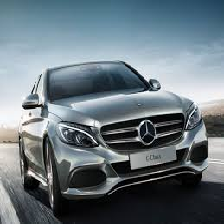

In [20]:
img=image.load_img('Datasets/Test/mercedes/45.jpg',target_size=(224,224))

img

In [21]:
x=image.img_to_array(img)
x

array([[[ 81., 113., 124.],
        [ 81., 113., 124.],
        [ 81., 113., 124.],
        ...,
        [ 31.,  66.,  88.],
        [ 31.,  66.,  86.],
        [ 31.,  66.,  86.]],

       [[ 82., 114., 125.],
        [ 82., 114., 125.],
        [ 82., 114., 125.],
        ...,
        [ 32.,  67.,  89.],
        [ 32.,  67.,  87.],
        [ 32.,  67.,  87.]],

       [[ 84., 116., 127.],
        [ 84., 116., 127.],
        [ 84., 116., 127.],
        ...,
        [ 33.,  68.,  90.],
        [ 33.,  68.,  88.],
        [ 33.,  68.,  88.]],

       ...,

       [[ 59.,  64.,  68.],
        [121., 126., 130.],
        [133., 138., 142.],
        ...,
        [ 17.,  20.,  25.],
        [ 17.,  20.,  25.],
        [ 17.,  20.,  25.]],

       [[ 67.,  70.,  75.],
        [ 90.,  93.,  98.],
        [140., 143., 148.],
        ...,
        [ 19.,  22.,  27.],
        [ 19.,  22.,  27.],
        [ 20.,  23.,  28.]],

       [[ 67.,  70.,  75.],
        [ 90.,  93.,  98.],
        [139., 1

In [22]:
x.shape

(224, 224, 3)

In [23]:
x=x/255


In [24]:
y=x.reshape(1,224,224,3)

In [25]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [26]:
model.predict(img_data)

array([[2.6906041e-10, 4.7866044e-10, 1.0000000e+00]], dtype=float32)

In [27]:
a=np.argmax(model.predict(img_data), axis=1)

In [28]:
a

array([2], dtype=int64)

In [29]:
if a==0:
    print("The car is AUDI")
elif a==1:
    print("The car is LAMBORGINI")
else:
    print("The car is MERCEDES")

The car is MERCEDES
